### How does PCA works?
### What are some applications of PCA and how do they work?

The below code provides the PCA results. The data set is used "USArrests" which provides the information of the ecrime by each state. 

Manual vs. package: 8.881784197001252e-16


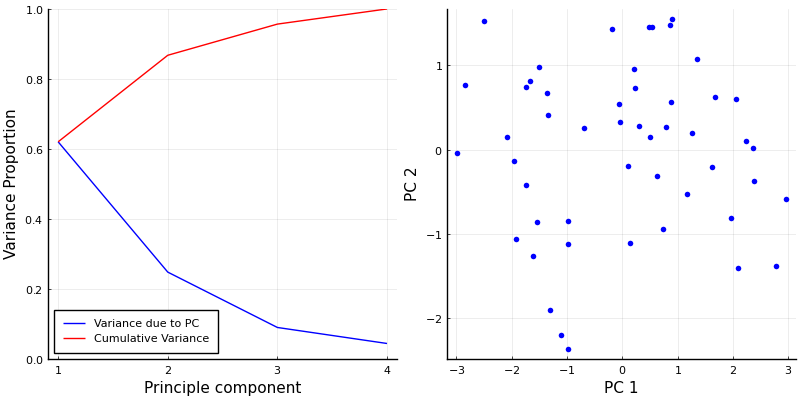

In [1]:
using Statistics, StatsBase, MultivariateStats, RDatasets, LinearAlgebra, Plots; pyplot()

#load data
data = dataset("datasets", "USArrests")
label = data[:,1]
data = data[:,[:Murder,:Assault,:UrbanPop,:Rape]]

# normalization
x = convert(Array{Float64,2},data)
dt = fit(ZScoreTransform, x, dims=1) # normalised
x = StatsBase.transform(dt, x)' # transpose

model = fit(PCA, x, maxoutdim=4, pratio = 0.999)
M = projection(model)


function manualProjection(x)
    covMat = cov(x') #covariance matrix n x p
    ev = eigvals(covMat) #eigenvales of covariance matrix
    eigOrder = sortperm(eigvals(covMat),rev=true) # sort eigenvalues
    eigvecs(covMat)[:,eigOrder] #permute matrix of (column) eigenvectors based on eigenvalue magnitude (higest->lowest)
end

println("Manual vs. package: ",maximum(abs.(M-manualProjection(x))))

pcVar = principalvars(model) ./ tvar(model)
cumVar = cumsum(pcVar)
pcDat = M[:,1:2]'*x

#contribution of eigenvalues to the dataset
p1 = plot(pcVar, c=:blue, label="Variance due to PC")
	plot!(1:length(cumVar), cumVar, label="Cumulative Variance", c=:red, 
        xlabel="Principle component",ylabel="Variance Proportion",ylims=(0,1))
p2 = scatter(pcDat[1,:],pcDat[2,:], c=:blue, xlabel="PC 1", ylabel="PC 2",
            msw=0, legend=:none)


plot(p1, p2, size=(800,400))


We can identify the feature of the US states by crime descriptions.

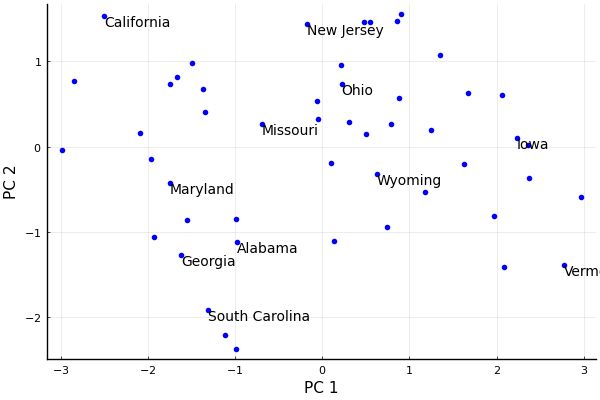

In [2]:
scatter(pcDat[1,:],pcDat[2,:], c=:blue, xlabel="PC 1", ylabel="PC 2",msw=0, 
    legend=:none)

annotate!(pcDat[1,1], pcDat[2,1], text(label[1], :left, :top, 10))
annotate!(pcDat[1,5], pcDat[2,5], text(label[5], :left, :top, 10))
annotate!(pcDat[1,10], pcDat[2,10], text(label[10], :left, :top, 10))
annotate!(pcDat[1,15], pcDat[2,15], text(label[15], :left, :top, 10))
annotate!(pcDat[1,20], pcDat[2,20], text(label[20], :left, :top, 10))
annotate!(pcDat[1,25], pcDat[2,25], text(label[25], :left, :top, 10))
annotate!(pcDat[1,30], pcDat[2,30], text(label[30], :left, :top, 10))
annotate!(pcDat[1,35], pcDat[2,35], text(label[35], :left, :top, 10))
annotate!(pcDat[1,40], pcDat[2,40], text(label[40], :left, :top, 10))
annotate!(pcDat[1,45], pcDat[2,45], text(label[45], :left, :top, 10))
annotate!(pcDat[1,50], pcDat[2,50], text(label[50], :left, :top, 10))

In [3]:
pcDat = M[:,2:3]'*x

2×50 Array{Float64,2}:
 -1.122     -1.06243  0.73846    …  -1.41053    0.605125  -0.317787
 -0.439804   2.0195   0.0542302      0.103722  -0.137469  -0.23824

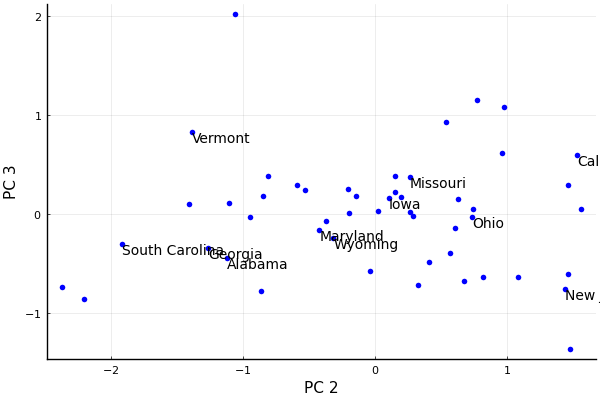

In [4]:
pcDat = M[:,2:3]'*x

scatter(pcDat[1,:],pcDat[2,:], c=:blue, xlabel="PC 2", ylabel="PC 3",msw=0, 
    legend=:none)
annotate!(pcDat[1,1], pcDat[2,1], text(label[1], :left, :top, 10))
annotate!(pcDat[1,5], pcDat[2,5], text(label[5], :left, :top, 10))
annotate!(pcDat[1,10], pcDat[2,10], text(label[10], :left, :top, 10))
annotate!(pcDat[1,15], pcDat[2,15], text(label[15], :left, :top, 10))
annotate!(pcDat[1,20], pcDat[2,20], text(label[20], :left, :top, 10))
annotate!(pcDat[1,25], pcDat[2,25], text(label[25], :left, :top, 10))
annotate!(pcDat[1,30], pcDat[2,30], text(label[30], :left, :top, 10))
annotate!(pcDat[1,35], pcDat[2,35], text(label[35], :left, :top, 10))
annotate!(pcDat[1,40], pcDat[2,40], text(label[40], :left, :top, 10))
annotate!(pcDat[1,45], pcDat[2,45], text(label[45], :left, :top, 10))
annotate!(pcDat[1,50], pcDat[2,50], text(label[50], :left, :top, 10))

We can identify the feature of the US states by crime.

How to be calculated PCA? PCA is processed through the orthornormalization to the basis of the dataset, and get the eigenvectors of the principal component. Principal component is selected from the larger of eigenvalues, which is selected as the maxmise the variance.

PCA is performed by the below steps

#### 1. standardization of the data
#### 2. covariance matrix calculation
#### 3. comnpute eigenvalues of the covariance matrix
#### 4. extract principal component with the larger eigenvalues

In [5]:
x # p x n matrix (features x obserbations)

4×50 Adjoint{Float64,Array{Float64,2}}:
  1.24256      0.507862  0.0716334  …  -0.479393  -1.19113    -0.226839
  0.782839     1.10682   1.4788        -1.07706   -1.41305    -0.117114
 -0.520907    -1.21176   0.99898       -1.83354    0.0317794  -0.382735
 -0.00341647   2.4842    1.04288       -1.27392   -1.11377    -0.601299

In [6]:
p, n = size(x)

(4, 50)

In [7]:
Σ= cov(x')

4×4 Array{Float64,2}:
 1.0        0.801873  0.0695726  0.563579
 0.801873   1.0       0.258872   0.665241
 0.0695726  0.258872  1.0        0.411341
 0.563579   0.665241  0.411341   1.0

In [8]:
ev = eigvals(covMat) #eigenvales of covariance matrix
eigOrder = sortperm(eigvals(covMat),rev=true) # sort eigenvalues
V = eigvecs(covMat)[:,eigOrder]

UndefVarError: UndefVarError: covMat not defined

In [9]:
ev=sort(ev, rev=true)
Λ=Diagonal(ev)

UndefVarError: UndefVarError: ev not defined

$\Sigma=V\Lambda V^T$

In [10]:
V*Λ*V'

UndefVarError: UndefVarError: V not defined

In [11]:
V[1,2]^2+V[2,2]^2+V[3,2]^2+V[4,2]^2

UndefVarError: UndefVarError: V not defined

In [12]:
M

4×4 Array{Float64,2}:
 -0.535899  -0.418181  -0.341233   0.649228
 -0.583184  -0.187986  -0.268148  -0.743407
 -0.278191   0.872806  -0.378016   0.133878
 -0.543432   0.167319   0.817778   0.0890243

Principal component is

In [13]:
M'*x

4×50 Array{Float64,2}:
 -0.97566   -1.93054   -1.74544    …   2.08739    2.05881    0.623101
 -1.122     -1.06243    0.73846       -1.41053    0.605125  -0.317787
 -0.439804   2.0195     0.0542302      0.103722  -0.137469  -0.23824
  0.154697  -0.434175  -0.826264       0.130583   0.182253  -0.164977

In [14]:
PC1 = V[1,1]*x[1]+V[2,1]*x[2]+V[3,1]*x[3]+V[4,1]*x[4]

UndefVarError: UndefVarError: V not defined

### Relationshiop with PCA and SVD

In [15]:
x

4×50 Adjoint{Float64,Array{Float64,2}}:
  1.24256      0.507862  0.0716334  …  -0.479393  -1.19113    -0.226839
  0.782839     1.10682   1.4788        -1.07706   -1.41305    -0.117114
 -0.520907    -1.21176   0.99898       -1.83354    0.0317794  -0.382735
 -0.00341647   2.4842    1.04288       -1.27392   -1.11377    -0.601299

In [16]:
p, n = size(x)

(4, 50)

With SVD, $X = USV^T$

In [17]:
F = svd(x)

SVD{Float64,Float64,Adjoint{Float64,Array{Float64,2}}}
U factor:
4×4 Adjoint{Float64,Array{Float64,2}}:
 -0.535899   0.418181  -0.341233   0.649228
 -0.583184   0.187986  -0.268148  -0.743407
 -0.278191  -0.872806  -0.378016   0.133878
 -0.543432  -0.167319   0.817778   0.0890243
singular values:
4-element Array{Float64,1}:
 11.024147920738598
  6.964085903724352
  4.179903808517687
  2.9151456736777206
Vt factor:
4×50 Adjoint{Float64,Array{Float64,2}}:
 -0.0885021  -0.175119  -0.158329  …  0.189347    0.186755    0.0565214
  0.161112    0.152558  -0.106038     0.202543   -0.0868922   0.0456322
 -0.105219    0.483145   0.012974     0.0248144  -0.0328882  -0.0569966
  0.0530665  -0.148938  -0.283438     0.0447947   0.0625195  -0.056593

In [18]:
U = F.U

4×4 Adjoint{Float64,Array{Float64,2}}:
 -0.535899   0.418181  -0.341233   0.649228
 -0.583184   0.187986  -0.268148  -0.743407
 -0.278191  -0.872806  -0.378016   0.133878
 -0.543432  -0.167319   0.817778   0.0890243

In [19]:
V = F.V

50×4 Array{Float64,2}:
 -0.0885021    0.161112    -0.105219     0.0530665
 -0.175119     0.152558     0.483145    -0.148938
 -0.158329    -0.106038     0.012974    -0.283438
  0.0126993    0.15918      0.0271351   -0.0620804
 -0.226649    -0.219329     0.141759    -0.116138
 -0.136005    -0.140382     0.259336     0.000497459
  0.122004    -0.154792    -0.152346    -0.0402308
 -0.00428421  -0.04625     -0.170198    -0.299509
 -0.270566     0.00557636  -0.136614    -0.0326972
 -0.147205     0.181803    -0.0811067    0.365668
  0.081955    -0.223242     0.012027     0.306583
  0.147251     0.0299899    0.0615302   -0.16949
 -0.123824    -0.0969242   -0.160455    -0.041437
  ⋮                                     
  0.0775652   -0.212086    -0.324452    -0.208361
 -0.118599     0.274835    -0.071178    -0.0446446
  0.178499     0.117039     0.0921985   -0.0372093
 -0.0897751    0.122285     0.0445447    0.221705
 -0.121689    -0.0586344   -0.116539     0.218422
  0.0494398   -0.209175     

In [20]:
S = Diagonal(F.S)

4×4 Diagonal{Float64,Array{Float64,1}}:
 11.0241   ⋅        ⋅       ⋅ 
   ⋅      6.96409   ⋅       ⋅ 
   ⋅       ⋅       4.1799   ⋅ 
   ⋅       ⋅        ⋅      2.91515

In [21]:
U*S*V'

4×50 Array{Float64,2}:
  1.24256      0.507862  0.0716334  …  -0.479393  -1.19113    -0.226839
  0.782839     1.10682   1.4788        -1.07706   -1.41305    -0.117114
 -0.520907    -1.21176   0.99898       -1.83354    0.0317794  -0.382735
 -0.00341647   2.4842    1.04288       -1.27392   -1.11377    -0.601299

In [22]:
U*S*V'-x

4×50 Array{Float64,2}:
  1.11022e-15  0.0          -1.66533e-16  …   2.22045e-16  -1.94289e-16
  2.9976e-15   6.66134e-16   6.66134e-16     -4.44089e-16  -4.16334e-17
 -3.33067e-16  1.33227e-15   9.99201e-16     -9.71445e-17   5.55112e-17
  1.02609e-15  0.0           4.44089e-16      0.0           0.0

With PCA, the relationship of the covariance matrix is $Σ=VLV^T$

In [23]:
Σ=cov(x')

4×4 Array{Float64,2}:
 1.0        0.801873  0.0695726  0.563579
 0.801873   1.0       0.258872   0.665241
 0.0695726  0.258872  1.0        0.411341
 0.563579   0.665241  0.411341   1.0

In [24]:
C = x*x'/(n-1) # p x p covariance matrix

4×4 Array{Float64,2}:
 1.0        0.801873  0.0695726  0.563579
 0.801873   1.0       0.258872   0.665241
 0.0695726  0.258872  1.0        0.411341
 0.563579   0.665241  0.411341   1.0

In [25]:
Λ = eigvals(Σ)
eigOrder = sortperm(eigvals(Σ),rev=true)
Λ = Λ[eigOrder]
L = Diagonal(Λ)

4×4 Diagonal{Float64,Array{Float64,1}}:
 2.48024   ⋅         ⋅         ⋅ 
  ⋅       0.989765   ⋅         ⋅ 
  ⋅        ⋅        0.356563   ⋅ 
  ⋅        ⋅         ⋅        0.17343

In [32]:
Λ = eigvals(Σ)
eigOrder = sortperm(eigvals(Σ),rev=true)
Vpca = eigvecs(Σ)[:,eigOrder]

4×4 Array{Float64,2}:
 -0.535899  -0.418181  -0.341233   0.649228
 -0.583184  -0.187986  -0.268148  -0.743407
 -0.278191   0.872806  -0.378016   0.133878
 -0.543432   0.167319   0.817778   0.0890243

In [33]:
Vpca*L*Vpca'

4×4 Array{Float64,2}:
 1.0        0.801873  0.0695726  0.563579
 0.801873   1.0       0.258872   0.665241
 0.0695726  0.258872  1.0        0.411341
 0.563579   0.665241  0.411341   1.0

In [34]:
Vpca*L*Vpca' - Σ

4×4 Array{Float64,2}:
 -8.88178e-16  -5.55112e-16   3.46945e-16  4.44089e-16
 -5.55112e-16  -2.22045e-16   4.996e-16    4.44089e-16
  3.60822e-16   4.44089e-16  -6.66134e-16  1.66533e-16
  4.44089e-16   5.55112e-16   1.66533e-16  9.99201e-16

$\Sigma = \dfrac{X^T X}{n-1}$, so

$\Sigma =V\Lambda V^T = \dfrac{VSU^TUSV^T}{n-1} = \dfrac{VS^2V^T}{n-1}$

In [35]:
Vpca*S^2*Vpca'/(n-1)

4×4 Array{Float64,2}:
 1.0        0.801873  0.0695726  0.563579
 0.801873   1.0       0.258872   0.665241
 0.0695726  0.258872  1.0        0.411341
 0.563579   0.665241  0.411341   1.0

The relationship can transform into

$\lambda_i = \dfrac{s_i^2}{n-1}$

In [36]:
S^2/(n-1)

4×4 Diagonal{Float64,Array{Float64,1}}:
 2.48024   ⋅         ⋅         ⋅ 
  ⋅       0.989765   ⋅         ⋅ 
  ⋅        ⋅        0.356563   ⋅ 
  ⋅        ⋅         ⋅        0.17343

In [37]:
L

4×4 Diagonal{Float64,Array{Float64,1}}:
 2.48024   ⋅         ⋅         ⋅ 
  ⋅       0.989765   ⋅         ⋅ 
  ⋅        ⋅        0.356563   ⋅ 
  ⋅        ⋅         ⋅        0.17343

With PCA, we can identify the difference and siminlarity of the features as well as reduce the redundunt dimentions.